# Tarea: Redes de mundo pequeño
## Tópicos selectos de Ciencia de Datos
### Luis David Huante

1. Construye una función (con tus propias manos) que permita crear grafos siguiendo el modelo propuesto por Watts & Strogatz

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd

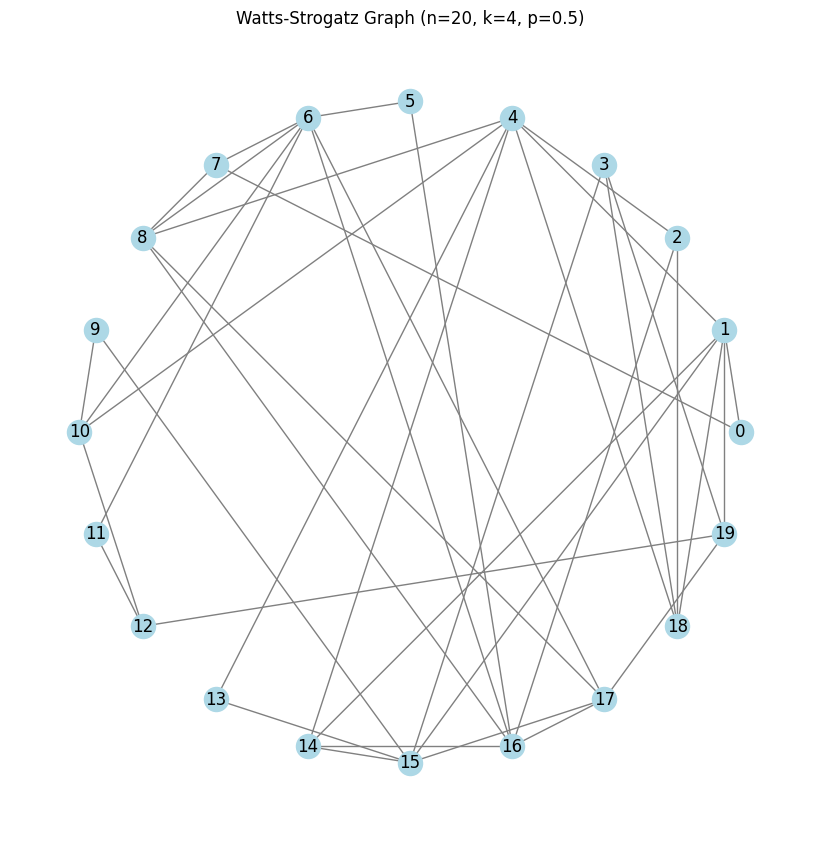

In [ ]:
def watts_strogatz_graph(n, k, p):
    # Creamos un anillo con n nodos
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)

    # Conectamos n nodos a sus k vecinos más cercanos
    for j in range(1, k // 2 + 1):
        targets = [(i, (i + j) % n) for i in nodes]
        G.add_edges_from(targets)

    # Reconectamos aristas con probabilidad p
    for i in nodes:
        for j in range(1, k // 2 + 1):
            if np.random.rand() < p:
                while True:
                    new_target = np.random.choice(nodes)
                    # Avitamos ciclos y nodos duplicados
                    if new_target != i and not G.has_edge(i, new_target):
                        break
                G.remove_edge(i, (i + j) % n)
                G.add_edge(i, new_target)

    return G

# Ejemplo
G = watts_strogatz_graph(20, 4, 0.5)

# Gráfica
plt.figure(figsize=(8, 8))
nx.draw_circular(G, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Watts-Strogatz Graph (n=20, k=4, p=0.5)")
plt.show()


2. Usando la función que construiste, reproduce la Figura 2 que aparece en el
artículo Collective dynamics of “small-world” networks de Watts & Strogatz.

3. El archivo smallWorld datasets.zip contiene redes tomadas de diferentes aplicaciones. Para cada una de ellas, identifica si satisfacen la propiedad de mundo pequeño. Justifica tu respuesta. Para este ejercicio bastará con tomar 3 modelos nulos de referencia. Además, en este ejercicio puedes usar el comando `watts_strogatz_graph`.

##  Jazz

Red de colaboración entre músicos de jazz. Cada nodo representa a un músico; existe una arista entre dos músicos si han tocado juntos en una banda.

In [ ]:
#Leemos el archivo
jazz_network = pd.read_csv('jazz.edges', sep='\t', skiprows=1, header=None, names=['Node1', 'Node2'])

# Creamos el grafo de la red de jazz
G_jazz = nx.Graph()
G_jazz.add_edges_from(jazz_network.values)

# Calculamos el average path length y el cpoeficiente de clustering
avg_path_length_jazz = nx.average_shortest_path_length(G_jazz)
clustering_coefficient_jazz = nx.average_clustering(G_jazz)

# Resultados
avg_path_length_jazz, clustering_coefficient_jazz

(2.2350407629595446, 0.6174507021536301)

Ahora vamos a generar tres grafos Watts-Strogatz de referencia con el mismo número de nodos y un grado medio cercano al grafo del jazz para comparar resultados.

In [ ]:
# Número de nodos y grado promedio en la red de jazz
n_jazz = len(G_jazz.nodes)
k_jazz = int(np.mean([d for n, d in G_jazz.degree()]))

# Generamos los grafos Watts-Strogatz
p_values = [0.1, 0.3, 0.5]
ws_graphs = [watts_strogatz_graph(n_jazz, k_jazz, p) for p in p_values]

# Calculamos el average path length y el coeficiente de clustering  para cada grafo WS
ws_metrics = [(nx.average_shortest_path_length(G), nx.average_clustering(G)) for G in ws_graphs]

# Resultados
ws_metrics

[(2.202379121160847, 0.5307927550557753),
 (1.9613392811362353, 0.30419659029178),
 (1.9075014100394811, 0.18019809041645082)]

## Red de músicos de jazz
- **Longitud promedio del camino más corto**: \(2.23\)
- **Coeficiente de Clustering**: \(0.617\)


In [ ]:
avg_path_length_jazz, clustering_coefficient_jazz

(2.2350407629595446, 0.6174507021536301)


## Redes de Referencia (Watts-Strogatz)

### Grafo Watts-Strogatz con \( p=0.1 \)
- Longitud promedio del camino más corto: \(2.22 \)
- Coeficiente de clustering: \( 0.55 \)

### Grafo Watts-Strogatz con \( p=0.3 \)
- Longitud promedio del camino más corto: \( 1.96 \)
- Coeficiente de clusteringo: \( 0.30 \)

### Grafo Watts-Strogatz con \( p=0.5 \)
- Longitud promedio del camino más corto: \( 1.9 \)
- Coeficiente de clustering: \( 0.18 \)


In [ ]:
ws_metrics

[(2.202379121160847, 0.5307927550557753),
 (1.9613392811362353, 0.30419659029178),
 (1.9075014100394811, 0.18019809041645082)]


### Análisis

La longitud promedio del camino corto en la red de jazz es muy parecida a la de las redes de Watts-Strogatz, lo que indica que los nodos en la red de jazz no están muy separados entre sí. El coeficiente de clustering de la red de jazz es significativamente mayor que el de las redes de referencia, especialmente en comparación con las redes con mayores valores de pp.

Por estas razones, la red de jazz sí satisface las propiedades de una red de pequeño mundo. Tiene una longitud promedio de camino más corto similar a las redes de Watts-Strogatz y un coeficiente de clustering relativamente alto, característica importante de las redes de pequeño mundo.

## Game Of Thrones

Red de relación entre personajes de las novelas Canción de hielo y fuego de George R. R. Martin. Los nodos representan personajes de la saga, hay una arista si dos personajes aparecen dentro de una ventana de 15 palabras de distancia. Nota que existe una arista por cada aparición conjunta, es decir, es una red con posiblemente múltiples
aristas entre la misma pareja de nodos. Para esta tarea, simplemente elimina las aristas repetidas.

In [ ]:
# Leemos el archivo
file_path_ice_fire = 'songIceFire.edges'
ice_fire_network = pd.read_csv(file_path_ice_fire, sep='\t', skiprows=1, header=None, names=['Node1', 'Node2', 'Weight'])

# Creamos el grafo
G_ice_fire = nx.Graph()
G_ice_fire.add_edges_from(ice_fire_network[['Node1', 'Node2']].values)

# Calculamos el average path length y el coeficiente de clustering  para cada grafo WS
avg_path_length_ice_fire = nx.average_shortest_path_length(G_ice_fire)
clustering_coefficient_ice_fire = nx.average_clustering(G_ice_fire)

#Resultados
avg_path_length_ice_fire, clustering_coefficient_ice_fire

(3.416225783003066, 0.48586220733504853)

Ahora vamos a generar tres grafos Watts-Strogatz de referencia con el mismo número de nodos y un grado medio cercano al grafo de GoT para comparar resultados.

In [ ]:
# Número de nodos y grado promedio en la red de GoT
n_ice_fire = len(G_ice_fire.nodes)
k_ice_fire = int(np.mean([d for n, d in G_ice_fire.degree()]))

# Generamos los grafos Watts-Strogatz
ws_graphs_ice_fire = [watts_strogatz_graph(n_ice_fire, k_ice_fire, p) for p in p_values]

# Cálculo de métricas para cada grafo de Watts-Strogatz
ws_metrics_ice_fire = [(nx.average_shortest_path_length(G), nx.average_clustering(G)) for G in ws_graphs_ice_fire]

#Resultados
ws_metrics_ice_fire

[(6.164154103852597, 0.4560381271436568),
 (4.424515660061313, 0.1971011261212268),
 (4.13564046648336, 0.0802276171622909)]

### Red de Canción de Hielo y Fuego
- **Longitud Promedio del Camino Corto**: \( 3.42 \)
- **Coeficiente de clustering**: \( 0.486 \)

### Redes de Referencia (Watts-Strogatz)
1. **WS con \( p = 0.1 \)**
   - Longitud promedio del camino más corto: \( 6.13 \)
   - Coeficiente de clustering: \( 0.459 \)

2. **WS con \( p = 0.3 \)**
   - Longitud promedio del camino más corto: \( 4.50 \)
   - Coeficiente de clustering: \( 0.213 \)

3. **WS con \( p = 0.5 \)**
   - Longitud promedio del camino más corto: \( 4.13 \)
   - Coeficiente de clustering: \( 0.083 \)

### Análisis
- La longitud promedio del camino más corto en la red de Game Of Thrones es significativamente menor que en las redes de prueba de Watts-Strogatz. Esto indica que, en general, es más fácil llegar de un personaje a otro en la red de la novela.
- El coeficiente de clustering es más alto en la red de la GoT que en las redes de Watts-Strogatz con mayores valores de \( p \), aunque es similar al de la red con \( p = 0.1 \).

Por esto, podemos decir que la red de Game Of Thrones parece cumplir con las propiedades de una red de pequeño mundo. A pesar de tener una longitud de camino más corta en comparación con las redes de referencia, tiene un nivel de clustering alto.

## Tráfico aéreo

 Red construida con datos de la Administración Federal de Aviación de USA. Cada nodo representa un aeropuerto, las aristas representan las rutas recomendadas por la Federación.

In [ ]:
# Leemos el archivo
faa_network = pd.read_csv('faa.edges', sep=' ', header=None, names=['Node1', 'Node2'])

# Creamos el grafo
G_faa = nx.Graph()
G_faa.add_edges_from(faa_network.values)

In [ ]:
# Calculamos el average path length y el coeficiente de clustering para la red de aeropuertos
avg_path_length_faa = nx.average_shortest_path_length(G_faa)
clustering_coefficient_faa = nx.average_clustering(G_faa)

NetworkXError: ignored

El grafo no está conectado, por lo que tenemos que elegir la componente conectada más grande.

In [ ]:
# Encontrar la componente conectada más grande
largest_cc = max(nx.connected_components(G_faa), key=len)
G_faa_largest_cc = G_faa.subgraph(largest_cc)

# Calculamos el average path length y el coeficiente de clustering
avg_path_length_faa_largest_cc = nx.average_shortest_path_length(G_faa_largest_cc)
clustering_coefficient_faa_largest_cc = nx.average_clustering(G_faa_largest_cc)

#Resultados
avg_path_length_faa_largest_cc, clustering_coefficient_faa_largest_cc

(1.9983484723369116, 0.0)

Ahora vamos a generar tres grafos Watts-Strogatz de referencia con el mismo número de nodos y un grado medio cercano al grafo de FAA para comparar resultados.

In [ ]:
# Calculamos el número de nodos y el grado medio del mayor componente conectado de la red FAA
n_faa = len(G_faa_largest_cc)
k_faa = max(int(np.mean([d for n, d in G_faa_largest_cc.degree()])), int(np.log(n_faa)))

# Cálculo de métricas para cada grafo de Watts-Strogatz
ws_graphs_faa = [watts_strogatz_graph(n_faa, k_faa, p) for p in p_values]
ws_metrics_faa = [(nx.average_shortest_path_length(G_faa_largest_cc), nx.average_clustering(G_faa_largest_cc)) for G_faa_largest_cc in ws_graphs_faa]

#Resultados
ws_metrics_faa

[(6.3206666166203735, 0.43847797307747943),
 (4.789214568930807, 0.21462030950057379),
 (4.404433191611331, 0.0820867040107342)]

### Red de la Administración Federal de Aviación (FAA)
- **Longitud Promedio del Camino Corto**: \( 1.998 \)
- **Coeficiente de Agrupamiento**: \( 0.0 \)

### Redes de Referencia (Watts-Strogatz)
1. **WS con \( p = 0.1 \)**
   - Longitud promedio del camino más corto: \( 6.48 \)
   - Coeficiente de clustering: \( 0.450 \)

2. **WS con \( p = 0.3 \)**
   - Longitud promedio del camino más corto: \( 4.83 \)
   - Coeficiente de clustering: \( 0.220 \)

3. **WS con \( p = 0.5 \)**
   - Longitud promedio del camino más corto: \( 4.37 \)
   - Coeficiente de clustering: \( 0.075 \)

### Análisis
- La longitud promedio del camino más corto en la red de la FAA es notablemente baja, mucho más baja que en las redes modelo deWatts-Strogatz.
- El coeficiente de clustering es 0, lo que indica que no hay agrupación local en la red.
Dado que la red de la FAA tiene una longitud de camino muy corta pero un coeficiente de agrupamiento nulo, no cumple con las propiedades típicas de una red de pequeño mundo. Mientras que sí está conectada entre sí la red, la falta de grupos locales es una diferencia significativa en las características de las redes de pequeño mundo.